The solutions manual has some solutions. Tomoki does not have anymore solutions (he has solutions for some exercises from Chapter 11). I have tried to solve as many from the rest as possible.

In [869]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma
import itertools
from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import nct as nct
from scipy.stats import f as fdist
from scipy.stats import ncf as ncfdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math
import sympy as sym
import random
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [870]:
def dx(a,t):
    return (norm.cdf(a, loc=0, scale=1)-t)
def invert_norm(t):
    a = 10.0
    b = -10.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dx(c,t)) > tol):
        c = (a+b)/2
        if(dx(c,t) > 0):
            a = c
        else:
            b = c
    return c

In [871]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

In [872]:
def dxt(a,df,t):
    return (studt.cdf(a, df, loc=0, scale=1)-t)
def invert_studt(t,df):
    a = 10.0 * int(np.sqrt(df/(df-2)))
    b = -10.0 * int(np.sqrt(df/(df-2)))
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxt(c,df,t)) > tol):
        c = (a+b)/2
        if(dxt(c,df,t) > 0):
            a = c
        else:
            b = c
    return c

#### Exercise 8.4.1. 

Let $X$ be $N(0,\theta)$ and, in the notation of this section, let $\theta' = 4,$ $\theta'' = 9,$ $\alpha_a = 0.05,$ and $\beta_a = 0.10.$ Show that the sequential probability ratio test can be based upon the statistic $\sum_{i=1}^n X_i^2.$ Determine $c_0(n)$ and $c_1(n).$

#### Answer from the back of the book

$\pmb{8.4.1.}$  $5.84n−32.42;$ $5.84n+41.62.$

#### Solution:

We have $k_0 = \alpha_a/(1-\beta_a) = 1/18$ and $k_1 = (1-\alpha_a)/\beta_a=19/2.$ The likelihood ratio is given by $$
\begin{align}
\dfrac{L(\theta',n)}{L(\theta'',n)} &\triangleq \Lambda(\theta',\theta'',n) \\
&= \left( \cfrac{\theta''}{\theta'}\right)^{n/2} \exp{\left[ \sum_{i=1}^n x_i^2 \left( \frac{1}{2\theta''} -\frac{1}{2\theta'}\right) \right]}
\end{align}
$$

and we cannot reach a decision till $k_0 \leq \Lambda(\theta',\theta'',n) \leq k_1.$ Taking log on both sides and after some algebra, we get

$$
\begin{align}
\frac{36n}{5}\log{\frac{9}{4}} + \frac{72}{5}\log{\frac{1}{k_1}} &\leq \sum_{i=1}^n x_i^2 \leq \frac{36n}{5}\log{\frac{9}{4}} + \frac{72}{5}\log{\frac{1}{k_0}} \\
\Longleftrightarrow 5.8387n - 32.4186 &\leq \sum_{i=1}^n x_i^2 \leq 5.8387n+41.6214.
\end{align}
$$

For small values of $n$, the lower bound $c_0(n)$ is negative. So if we are observing less than six samples, we can not reject the alternative (or accept the null) at all!

In [873]:
slope = 36/5*np.log(9/4)
c0 = 72/5*np.log(2/19)
c1 = 72/5*np.log(18)

slope,c0,c1

(5.838697556757567, -32.418601899933535, 41.62135331370477)

In [874]:
def get_statistic8p4p1(sig,nmax,rs = None):
    samples = norm.rvs(loc=0,scale=sig,size=nmax,random_state = rs)
    statistic = np.cumsum([xi*xi for xi in samples])
    return statistic

In [875]:
nmax = 60
nlist = [i for i in range(1,nmax+1)]

lowerlim = []
upperlim = []
statistic2 = get_statistic8p4p1(2,nmax,1)
statistic3 = get_statistic8p4p1(3,nmax,4)

for ni in nlist:
    lowerlim.append(slope*ni+c0)
    upperlim.append(slope*ni+c1)

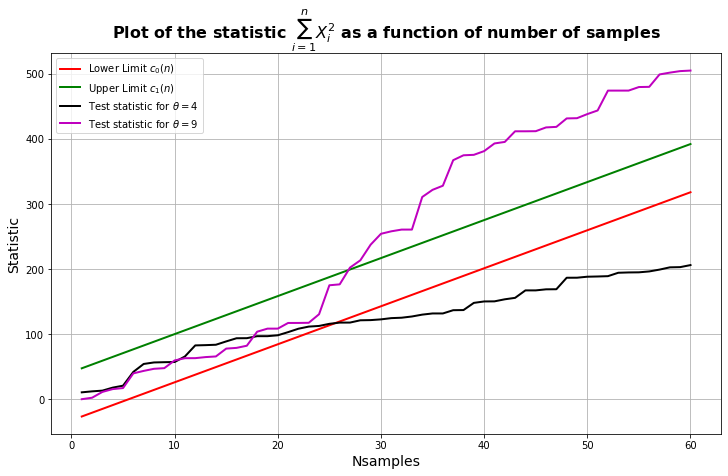

In [876]:
plt.figure(figsize = (12,7))

plt.plot(nlist,lowerlim,linewidth=2,color='r')
plt.plot(nlist,upperlim,linewidth=2,color='g')
plt.plot(nlist,statistic2,linewidth=2,color='k')
plt.plot(nlist,statistic3,linewidth=2,color='m')
plt.ylabel('Statistic',fontsize=14)
plt.xlabel('Nsamples',fontsize=14)
plt.legend(['Lower Limit $c_0(n)$','Upper Limit $c_1(n)$','Test statistic for $\\theta = 4$','Test statistic for $\\theta = 9$'])
plt.grid()
plt.title('Plot of the statistic $\sum_{i=1}^n X_i^2$ as a function of number of samples',fontsize=16,fontweight='bold')
plt.show()

The plot above nicely shows how the statistic "escapes" the bounds after certain number of samples have been drawn. I have included random_state while generating the random samples just so that I could freeze this particular set of random variates. If it is set to None, then it would draw random random variates each time we run this code instead of fixing the sample values to a particular set.

#### Exercise 8.4.3. 

Let the independent random variables $Y$ and $Z$ be $N(\mu_1, 1)$ and $N(\mu_2, 1),$ respectively. Let $\theta = \mu_1 − \mu_2$. Let us observe independent observations from each distribution, say $Y_1,Y_2,\cdots$ and $Z_1,Z_2,\cdots$. To test sequentially the hypothesis $H_0 : \theta = 0$ against $H_1 : \theta = 1/2,$ use the sequence $X_i = Y_i −Z_i, i = 1,2,\cdots$. If $\alpha_a = \beta_a = 0.05,$ show that the test can be based upon $\overline{X} = \overline{Y} −\overline{Z}.$ Find $c_0(n)$ and $c_1(n).$

#### Solution:

We have $k_0 = \alpha_a/(1-\beta_a) = 1/19$ and $k_1 = (1-\alpha_a)/\beta_a=19.$ Now $X = Z-Y \sim N(\mu_1-\mu_2,2) \sim N(\theta,2)$ so that this is actually exactly same as example $8.4.2$ except that the values are different.

However, we are supposed to show that the test "can be based upon $\overline{X}$" rather than $S = \sum X_i$. Going through the usual drill, we get

$$
\begin{align}
-\log{19} &< \frac{n(\theta_1-\theta_2)}{\sigma^2}\left( \overline{x} -\frac{\theta_1+\theta_2}{2}\right) < \log{19} \\
\Longleftrightarrow \frac{\theta_1+\theta_2}{2}-\frac{\sigma^2}{n(\theta_2-\theta_1)}\log{19} &< \overline{x} < \frac{\theta_1+\theta_2}{2}+\frac{\sigma^2}{n(\theta_2-\theta_1)}\log{19}
\end{align}
$$

where $\sigma^2 = 2$, $(\theta_2-\theta_1) = 1/2 - 0 = 1/2$, and $(\theta_2+\theta_1)/2 = 1/4$ so that 

$$
\begin{align}
c_0(n) &= \frac{1}{4}-\frac{4}{n}\log{19} \\
c_1(n) &= \frac{1}{4}+\frac{4}{n}\log{19}.
\end{align}
$$

In [877]:
def get_statistic8p4p3(mu,nmax,rs = None):
    samples = norm.rvs(loc=mu,scale=np.sqrt(2),size=nmax,random_state = rs)
    sumstat = np.cumsum([xi for xi in samples])
    statistic = []
    for ni in range(len(sumstat)):
        statistic.append(sumstat[ni]/(ni+1))
    return statistic

In [878]:
slope = 4*np.log(19)

In [879]:
nmin = 10
nmax = 100
nlist = [i for i in range(1,nmax+1)]

lowerlim = []
upperlim = []
statistic0 = get_statistic8p4p3(0,nmax,1)
statistic1 = get_statistic8p4p3(0.5,nmax,4)

for ni in nlist:
    lowerlim.append(0.25-slope/ni)
    upperlim.append(0.25+slope/ni)

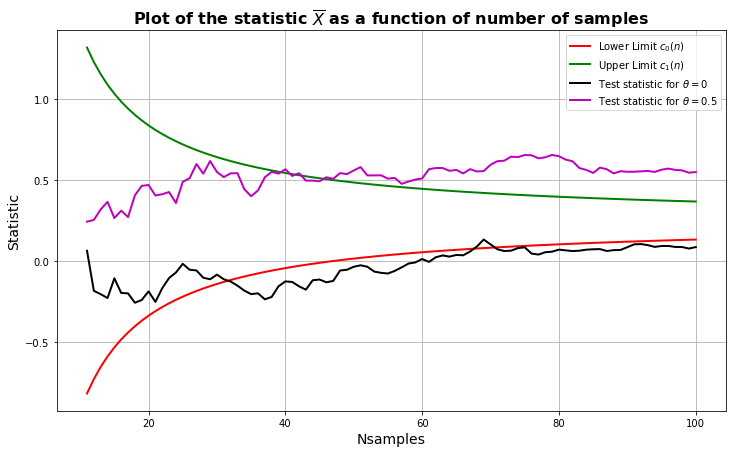

In [880]:
plt.figure(figsize = (12,7))

plt.plot(nlist[nmin:nmax+1],lowerlim[nmin:nmax+1],linewidth=2,color='r')
plt.plot(nlist[nmin:nmax+1],upperlim[nmin:nmax+1],linewidth=2,color='g')
plt.plot(nlist[nmin:nmax+1],statistic0[nmin:nmax+1],linewidth=2,color='k')
plt.plot(nlist[nmin:nmax+1],statistic1[nmin:nmax+1],linewidth=2,color='m')
plt.ylabel('Statistic',fontsize=14)
plt.xlabel('Nsamples',fontsize=14)
plt.legend(['Lower Limit $c_0(n)$','Upper Limit $c_1(n)$','Test statistic for $\\theta = 0$','Test statistic for $\\theta = 0.5$'])
plt.grid()
plt.title('Plot of the statistic $\overline{X}$ as a function of number of samples',fontsize=16,fontweight='bold')
plt.show()

#### Exercise 8.4.5. 

Let $X_1,X_2,\cdots,X_n$ be a random sample from a distribution with pdf $f(x;\theta) = \theta x^{\theta-1},$ $0 < x < 1,$ zero elsewhere.

***(a)*** Find a complete sufficient statistic for $\theta$.

***(b)*** If $\alpha_a = \beta_a = 1/10,$ find the sequential probability ratio test of $H_0 : \theta = 2$ against $H_1 :\theta=3.$

#### Solution:

***(a)*** Example $7.2.5$ and exercise $7.5.3$ deal with this. Not sure why he repeats it. Basically this belongs to the exponential family of distributions and $r \triangleq \prod_{i=1}^nx_i$ is a complete sufficient statistic for $\theta$.

***(b)*** We have $k_0 = \alpha_a/(1-\beta_a) = 1/9$ and $k_1 = (1-\alpha_a)/\beta_a=9.$ The usual drill of finding the likelihood ratio and incorporating it into equation $8.4.3$ results in

$$
\begin{align}
\frac{1}{9} &< \left(\frac{\theta_1}{\theta_2} \right)^n \left[ \prod_{i=1}^n x_i \right]^{\theta_1-\theta_2} < 9.
\end{align}
$$

Let $r \triangleq \prod_{i=1}^n x_i$ just like in ***(a)***. Then

$$
\begin{align}
\frac{1}{9} &< \left(\frac{\theta_1}{\theta_2} \right)^n r^{\theta_1-\theta_2} < 9 \\
\Longleftrightarrow \left(\frac{\theta_1}{\theta_2} \right)^n \times \frac{1}{9} &< r < \left(\frac{\theta_1}{\theta_2} \right)^n \times 9
\end{align}
$$

so that in the notation of equation $8.4.4$ of the text, $c_0(n) \triangleq 2^n/3^{n+2}$ and $c_1(n) \triangleq 2^n/3^{n-2}$ and our statistic is $u(x_1,x_2,\cdots,x_n) =r \triangleq \prod_{i=1}^n x_i.$

We can generate the pdf $f(x;\theta) = \theta x^{\theta-1}$ by taking the maximum of $\theta$ random variates from uniform random variables because the maximum order statistic has that pdf. Following is a code to see the result above in action.

In [881]:
def gen_yn(n):
    xlist = np.random.random(n)
    random_variates = [1-xi for xi in xlist]
    return np.max(random_variates)

In [882]:
def get_samples8p4p5(theta,nmax):
    samples = []
    for i in range(nmax):
        samples.append(gen_yn(theta))
    return samples

In [883]:
def get_statistics8p4p5(theta,nmax):
    thisamples = get_samples8p4p5(theta,nmax)
    return(np.cumprod(thisamples))

In [884]:
nmin = 16
nmax = 30
nlist = [i for i in range(1,nmax+1)]

lowerlim = []
upperlim = []
statistic2 = get_statistics8p4p5(2,nmax)
statistic3 = get_statistics8p4p5(3,nmax)

for ni in nlist:
    lowerlim.append((2/3)**ni/9)
    upperlim.append(9*(2/3)**ni)

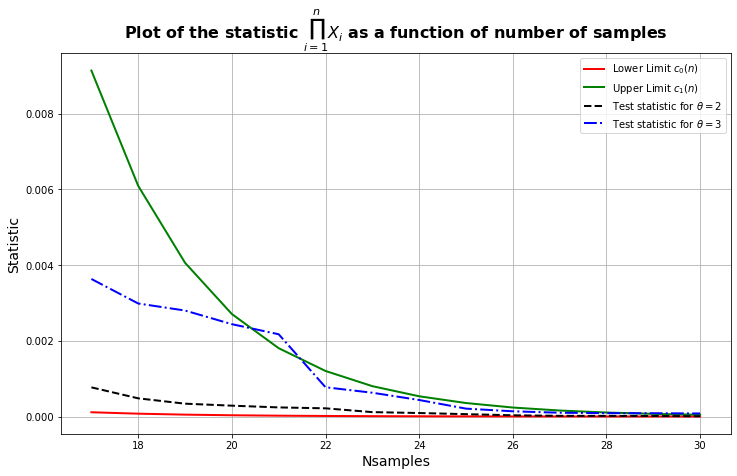

In [885]:
plt.figure(figsize = (12,7))

plt.plot(nlist[nmin:],lowerlim[nmin:],linewidth=2,color='r')
plt.plot(nlist[nmin:],upperlim[nmin:],linewidth=2,color='g')
plt.plot(nlist[nmin:],statistic2[nmin:],linewidth=2,color='k',linestyle='--')
plt.plot(nlist[nmin:],statistic3[nmin:],linewidth=2,color='b',linestyle='-.')
plt.ylabel('Statistic',fontsize=14)
plt.xlabel('Nsamples',fontsize=14)
plt.legend(['Lower Limit $c_0(n)$','Upper Limit $c_1(n)$','Test statistic for $\\theta = 2$','Test statistic for $\\theta = 3$'])
plt.grid()
plt.title('Plot of the statistic $\prod_{i=1}^n X_i$ as a function of number of samples',fontsize=16,fontweight='bold')
plt.show()